<a href="https://colab.research.google.com/github/jlozion/Elective2-MachineLearning-/blob/main/Cleaning_Data_in_Python_live_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Cleaning Data in Python live training**

Welcome to this live, hands-on training where you will learn how to effectively diagnose and treat missing data in Python.

The majority of data science work often revolves around pre-processing data, and making sure it's ready for analysis. In this session, we will be covering how transform our raw data into accurate insights. In this notebook, you will learn:

* Import data into `pandas`, and use simple functions to diagnose problems in our data.
* Visualize missing and out of range data using `missingno` and `seaborn`.
* Apply a range of data cleaning tasks that will ensure the delivery of accurate insights.


## **Getting started**

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [14]:
# Read in the dataset
new_year_resolution = pd.read_csv('/content/new_year_resolution.csv', index_col = 0)

## **Diagnosing data cleaning problems using simple `pandas` and visualizations** 

Some important and common methods needed to get a better understanding of DataFrames and diagnose potential data problems are the following: 

- `.head()` prints the header of a DataFrame
- `.dtypes` prints datatypes of all columns in a DataFrame
- `.info()` provides a bird's eye view of column data types and missing values in a DataFrame
- `.describe()` returns a distribution of numeric columns in your DataFrame
- `.isna().sum()` allows us to break down the number of missing values per column in our DataFrame
- `.unique()` finds the number of unique values in a DataFrame column
- `sns.displot()` plots the distribution of one column in your DataFrame.

In [6]:
# Print the header of the DataFrame
new_year_resolution.head(4)

,Name,Age,Gender,Profession,New Year's Resolution
Email Address,,,,,
annepauline.topacio@tup.edu.ph,Pauline Topacio,22,Female,Student,"Eat healthier, Read more, Lose weight, Achieve..."
paulenglaxamana@gmail.com,Pauleng,20,Prefer not to say,Student,"Get a new job, Spend more time with family and..."
chinmacy.maroto@tup.edu.ph,Chin Macy E. Maroto,22,Female,Student,"Travel more, Eat healthier, Get a new job, Exe..."
jamiiemoros30@gmail.com,jamiie,22,Prefer not to say,Student,"Achieve a personal goal, Save money, Get more ..."


By merely looking at the data, we can already diagnose a range of potential problems down the line such as:

<br>

_Data type problems:_

- **Problem 1**: The returned object for New Year Resolution is usable. I have to think ways to piece by piece it. 

<br>

_Missing data problems:_

- **Problem 2**: We can see that there are missing data in some columns, we'll get a better bird's eye view of that down the line.

<br>

In [ ]:
# Print data types of DataFrame
new_year_resolution.dtypes

Name                     object
Age                       int64
Gender                   object
Profession               object
New Year's Resolution    object
dtype: object

In [ ]:
# Print info of DataFrame
new_year_resolution.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, annepauline.topacio@tup.edu.ph to matthewescandor52@gmail.com
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   73 non-null     object
 1   Age                    73 non-null     int64 
 2   Gender                 73 non-null     object
 3   Profession             67 non-null     object
 4   New Year's Resolution  73 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.4+ KB


In [ ]:
# Print number of missing values
new_year_resolution.isna().sum()

Name                     0
Age                      0
Gender                   0
Profession               6
New Year's Resolution    0
dtype: int64

In [ ]:
# Print description of DataFrame
new_year_resolution.describe()

,Age
count,73.000000
mean,22.273973
std,5.429498
min,13.000000
25%,21.000000
50%,22.000000
75%,23.000000
max,63.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


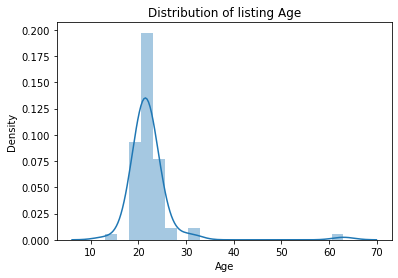

In [ ]:
# Visualize the distribution of the Age
sns.distplot(new_year_resolution['Age'], bins = 20)
plt.title('Distribution of listing Age')
plt.show()

In [ ]:
# Find number of unique values in Profession
new_year_resolution['Profession'].unique()

array(['Student', 'Student ', 'BSEED MAJOR IN SOCIAL STUDIES', nan,
       'Analyst ', 'student ', 'student', 'Laboratory Analyst',
       'Unemployed', 'Civil Engineer', 'Talent Acquisition Specialist',
       'House Wife', 'Wala', 'Nursing Student ', 'freshmen ',
       'Ganda lang', 'Call Center Agent', 'Cashier', 'Operations',
       'Customer Rep\\', 'Artist', 'Employed', 'CSR', 'Engineer',
       'Software Engineer', 'Worker', 'Customer Service Rep', 'Secretary',
       'Volleyball Player', 'Musician'], dtype=object)

In [ ]:
# How many values of different room_types do we have?
new_year_resolution['Profession'].value_counts()

Student                          31
student                           4
Civil Engineer                    3
Call Center Agent                 3
Student                           2
Operations                        1
Volleyball Player                 1
Secretary                         1
Customer Service Rep              1
Worker                            1
Software Engineer                 1
Engineer                          1
CSR                               1
Employed                          1
Artist                            1
Customer Rep\                     1
Ganda lang                        1
Cashier                           1
freshmen                          1
Nursing Student                   1
Wala                              1
House Wife                        1
Talent Acquisition Specialist     1
Unemployed                        1
Laboratory Analyst                1
student                           1
Analyst                           1
BSEED MAJOR IN SOCIAL STUDIE

## **Cleaning data** 

### Data type problems

In [7]:
# Reminder of the DataFrame
new_year_resolution.head()

,Name,Age,Gender,Profession,New Year's Resolution
Email Address,,,,,
annepauline.topacio@tup.edu.ph,Pauline Topacio,22,Female,Student,"Eat healthier, Read more, Lose weight, Achieve..."
paulenglaxamana@gmail.com,Pauleng,20,Prefer not to say,Student,"Get a new job, Spend more time with family and..."
chinmacy.maroto@tup.edu.ph,Chin Macy E. Maroto,22,Female,Student,"Travel more, Eat healthier, Get a new job, Exe..."
jamiiemoros30@gmail.com,jamiie,22,Prefer not to say,Student,"Achieve a personal goal, Save money, Get more ..."
Reyhannahlineses@gmail.com,Hannah Rey,21,Female,BSEED MAJOR IN SOCIAL STUDIES,"Travel more, Achieve a personal goal"


To perform this task, we will be using the following methods:

- `.str.lower()` to lowercase all rows in a string column
- `.str.strip()` to remove all white spaces of each row in a string column
- `.replace()` to replace values in a column with another

In [ ]:
# Print unique values of `room_type`
new_year_resolution['Profession'].unique()

array(['Student', 'Student ', 'BSEED MAJOR IN SOCIAL STUDIES', nan,
       'Analyst ', 'student ', 'student', 'Laboratory Analyst',
       'Unemployed', 'Civil Engineer', 'Talent Acquisition Specialist',
       'House Wife', 'Wala', 'Nursing Student ', 'freshmen ',
       'Ganda lang', 'Call Center Agent', 'Cashier', 'Operations',
       'Customer Rep\\', 'Artist', 'Employed', 'CSR', 'Engineer',
       'Software Engineer', 'Worker', 'Customer Service Rep', 'Secretary',
       'Volleyball Player', 'Musician'], dtype=object)

In [ ]:
# Deal with capitalized values
new_year_resolution['Profession'] = new_year_resolution['Profession'].str.lower()
new_year_resolution['Profession'].unique()

array(['student', 'student ', 'bseed major in social studies', nan,
       'analyst ', 'laboratory analyst', 'unemployed', 'civil engineer',
       'talent acquisition specialist', 'house wife', 'wala',
       'nursing student ', 'freshmen ', 'ganda lang', 'call center agent',
       'cashier', 'operations', 'customer rep\\', 'artist', 'employed',
       'csr', 'engineer', 'software engineer', 'worker',
       'customer service rep', 'secretary', 'volleyball player',
       'musician'], dtype=object)

In [ ]:
# Deal with trailing spaces
new_year_resolution['Profession'] = new_year_resolution['Profession'].str.strip()
new_year_resolution['Profession'].unique()

array(['student', 'bseed major in social studies', nan, 'analyst',
       'laboratory analyst', 'unemployed', 'civil engineer',
       'talent acquisition specialist', 'house wife', 'wala',
       'nursing student', 'freshmen', 'ganda lang', 'call center agent',
       'cashier', 'operations', 'customer rep\\', 'artist', 'employed',
       'csr', 'engineer', 'software engineer', 'worker',
       'customer service rep', 'secretary', 'volleyball player',
       'musician'], dtype=object)

In [9]:
# Replace values to 'Shared room', 'Entire place', 'Private room' and 'Hotel room' (if applicable).
mappings = {'student': 'Student'}

# Replace values and collapse data
new_year_resolution['Profession'] = new_year_resolution['Profession'].replace(mappings)
new_year_resolution['Profession'].unique()

array(['Student', 'Student ', 'BSEED MAJOR IN SOCIAL STUDIES', nan,
       'Analyst ', 'student ', 'Laboratory Analyst', 'Unemployed',
       'Civil Engineer', 'Talent Acquisition Specialist', 'House Wife',
       'Wala', 'Nursing Student ', 'freshmen ', 'Ganda lang',
       'Call Center Agent', 'Cashier', 'Operations', 'Customer Rep\\',
       'Artist', 'Employed', 'CSR', 'Engineer', 'Software Engineer',
       'Worker', 'Customer Service Rep', 'Secretary', 'Volleyball Player',
       'Musician'], dtype=object)

##### **Task 5:** Divide `neighbourhood_full` into 2 columns and making sure they are clean

In [11]:
new_year_resolution.head()

,Name,Age,Gender,Profession,New Year's Resolution
Email Address,,,,,
annepauline.topacio@tup.edu.ph,Pauline Topacio,22,Female,Student,"Eat healthier, Read more, Lose weight, Achieve..."
paulenglaxamana@gmail.com,Pauleng,20,Prefer not to say,Student,"Get a new job, Spend more time with family and..."
chinmacy.maroto@tup.edu.ph,Chin Macy E. Maroto,22,Female,Student,"Travel more, Eat healthier, Get a new job, Exe..."
jamiiemoros30@gmail.com,jamiie,22,Prefer not to say,Student,"Achieve a personal goal, Save money, Get more ..."
Reyhannahlineses@gmail.com,Hannah Rey,21,Female,BSEED MAJOR IN SOCIAL STUDIES,"Travel more, Achieve a personal goal"


In [15]:
# Print header of column
new_year_resolution['New Years Resolution'].head()

Email Address
annepauline.topacio@tup.edu.ph    Eat healthier, Read more, Lose weight, Achieve...
paulenglaxamana@gmail.com         Get a new job, Spend more time with family and...
chinmacy.maroto@tup.edu.ph        Travel more, Eat healthier, Get a new job, Exe...
jamiiemoros30@gmail.com           Achieve a personal goal, Save money, Get more ...
Reyhannahlineses@gmail.com                     Travel more, Achieve a personal goal
Name: New Years Resolution, dtype: object

In [17]:
# Split neighbourhood_full
resolution = new_year_resolution['New Years Resolution'].str.split(",", expand = True)
resolution.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Email Address,,,,,,,,,,,,,,,,,,
annepauline.topacio@tup.edu.ph,Eat healthier,Read more,Lose weight,Achieve a personal goal,Get organized,Start a new business or side hustle,Learn a new skill or hobby,None,None,None,None,None,None,None,None,None,None,None
paulenglaxamana@gmail.com,Get a new job,Spend more time with family and friends,Save money,Reduce stress,Travel more,Eat healthier,Achieve a personal goal,Learn a new skill or hobby,Get organized,None,None,None,None,None,None,None,None,None
chinmacy.maroto@tup.edu.ph,Travel more,Eat healthier,Get a new job,Exercise more,Improve relationships,Read more,Start a new business or side hustle,Get more sleep,Quit a bad habit,Drink less alcohol,Spend more time with family and friends,Save money,Reduce stress,Get organized,Achieve a personal goal,Volunteer or give back to the community,Learn a new skill or hobby,Get a promotion at work
jamiiemoros30@gmail.com,Achieve a personal goal,Save money,Get more sleep,Exercise more,Reduce stress,Lose weight,None,None,None,None,None,None,None,None,None,None,None,None
Reyhannahlineses@gmail.com,Travel more,Achieve a personal goal,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
